# DAE Project 2

##### Kudzai Saurombe- 2503314
##### Riot Ndlovu- 2096330
##### Tapiwa Chatikobo - 2442335

## Data Exploration and visualisation

In [1]:
import pandas as pd
import seaborn as sns
import imblearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [2]:
# Load the dataset from the text file
df = pd.read_csv('Data_Scientists_data.txt', delimiter=',') 

# Drop the 'ID' column as it isnt useful in our logistic regression
df.drop(columns=['ID'], inplace=True)


#Display the first few rows of the dataset
df.head()

,Pay,Perf,EstHap,Stay
0,33000,6,7,1
1,25000,6,7,1
2,16000,5,6,1
3,17000,7,7,1
4,28000,7,7,1


In [3]:
#Check the data types of each column using the dtypes attribute.
print(df.dtypes,"\n\nMINIMUM VALUES",)
print(df.min(), "\n\nMAXIMUM VALUES")
print(df.max())

Pay       int64
Perf      int64
EstHap    int64
Stay      int64
dtype: object 

MINIMUM VALUES
Pay       10000
Perf          2
EstHap        4
Stay          0
dtype: int64 

MAXIMUM VALUES
Pay       295000
Perf          10
EstHap        11
Stay           2
dtype: int64


In [4]:
#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pay     500 non-null    int64
 1   Perf    500 non-null    int64
 2   EstHap  500 non-null    int64
 3   Stay    500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB
None


In [5]:
#Display descriptive statistics
print(df.describe())

                 Pay        Perf      EstHap        Stay
count     500.000000  500.000000  500.000000  500.000000
mean    23602.000000    6.052000    6.440000    0.918000
std     13519.806446    1.446887    0.984041    0.281842
min     10000.000000    2.000000    4.000000    0.000000
25%     19000.000000    5.000000    6.000000    1.000000
50%     22000.000000    6.000000    6.000000    1.000000
75%     27000.000000    7.000000    7.000000    1.000000
max    295000.000000   10.000000   11.000000    2.000000


In [6]:
#Check for missing values
print(df.isnull().sum())

Pay       0
Perf      0
EstHap    0
Stay      0
dtype: int64


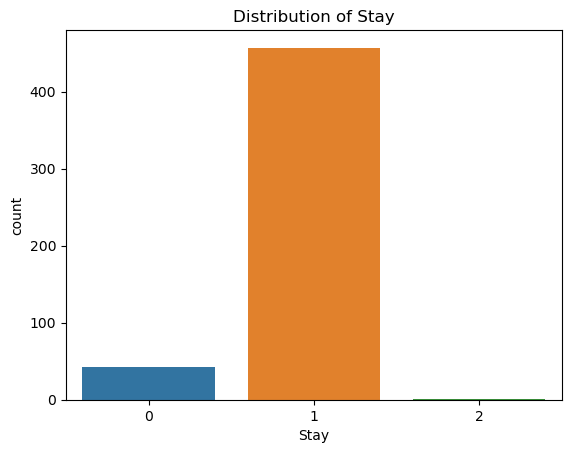

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


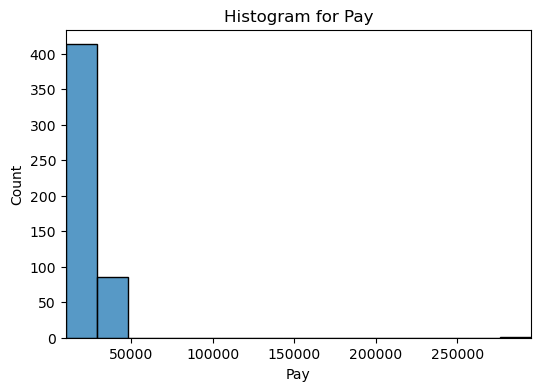

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


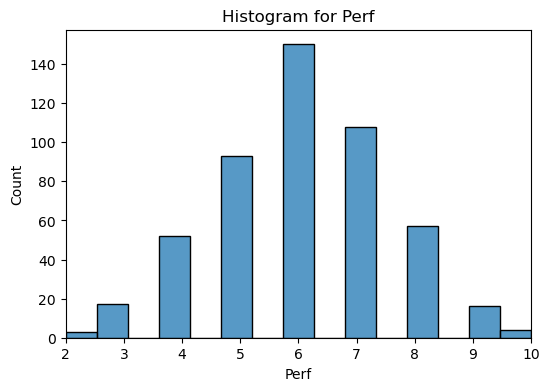

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


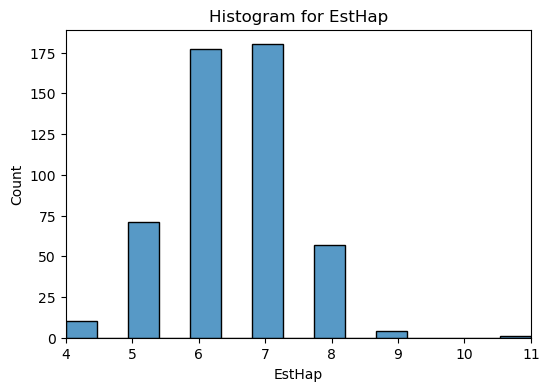

In [7]:
# Visualize the categorical variable 'Stay' using a bar plot
sns.countplot(x='Stay', data=df)
plt.title('Distribution of Stay')
plt.show()

# Plot histograms for the remaining numerical features
features = ['Pay', 'Perf', 'EstHap']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=15, kde=False)
    plt.xlim(df[feature].min(), df[feature].max())  
    plt.title(f'Histogram for {feature}')
    plt.show()

In [8]:
def identify_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.3 * IQR
        upper_bound = Q3 + 1.3 * IQR
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outliers[feature] = outlier_indices
    return outliers

# Specify the features you want to check for outliers
features_to_check = ['Pay', 'Perf', 'EstHap']

# Call the function to identify outliers
outliers_dict = identify_outliers(df, features_to_check)

# Print the outliers for each feature
for feature, outlier_indices in outliers_dict.items():
    print(f"Outliers in {feature}:")
    print(df.loc[outlier_indices, feature])
    print("---")
# Identify and remove the outlier in 'Pay'
max_pay = df['Pay'].max()
df = df[df['Pay'] != max_pay]

# Identify and remove the one outlier in 'Stay'
df = df[df['Stay'] != df['Stay'].max()]

Outliers in Pay:
12      38000
29      44000
54      38000
200    295000
215     41000
224     39000
228     41000
314     38000
461     39000
472     41000
499     38000
Name: Pay, dtype: int64
---
Outliers in Perf:
10     10
166    10
178     2
199    10
243    10
397     2
445     2
Name: Perf, dtype: int64
---
Outliers in EstHap:
14      9
70      4
150    11
198     4
213     9
230     4
261     4
262     4
284     4
286     4
293     9
349     4
399     4
460     4
497     9
Name: EstHap, dtype: int64
---


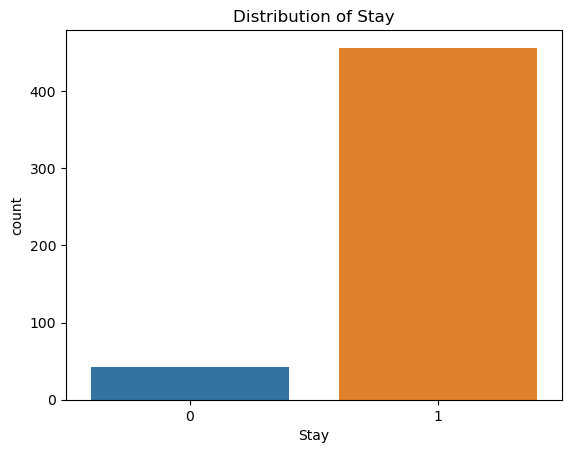

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


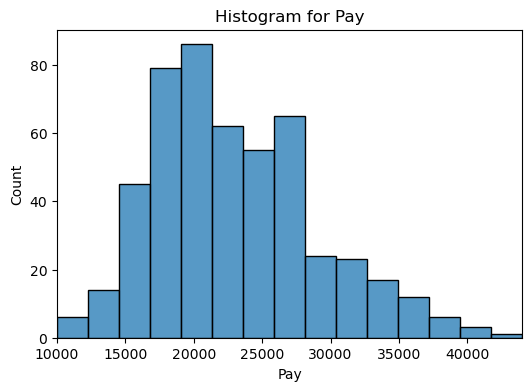

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


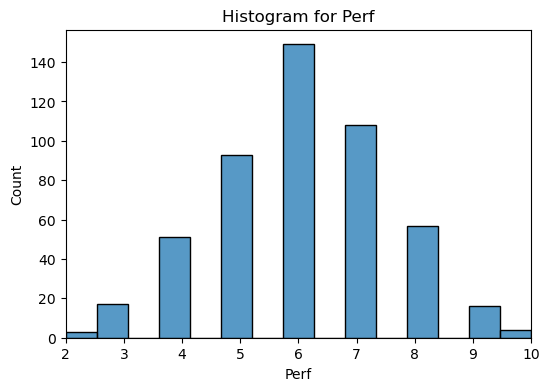

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


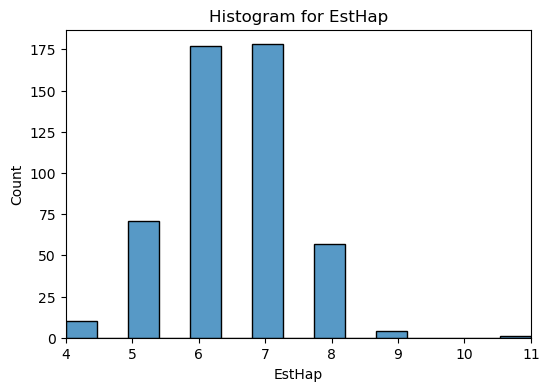

In [9]:
# Visualize the categorical variable 'Stay' using a bar plot with outlier removed
sns.countplot(x='Stay', data=df)
plt.title('Distribution of Stay')
plt.show()

# Plot histograms for the remaining numerical features with outlier removed
features = ['Pay', 'Perf', 'EstHap']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=15, kde=False)
    plt.xlim(df[feature].min(), df[feature].max()) 
    plt.title(f'Histogram for {feature}')
    plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


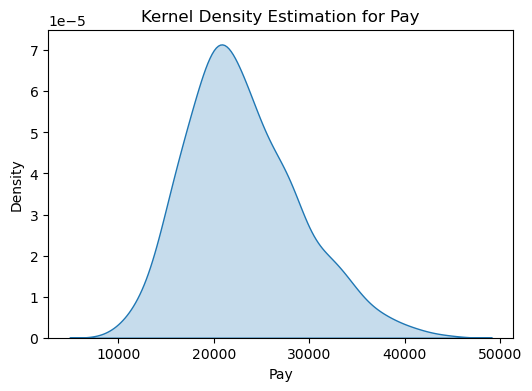

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


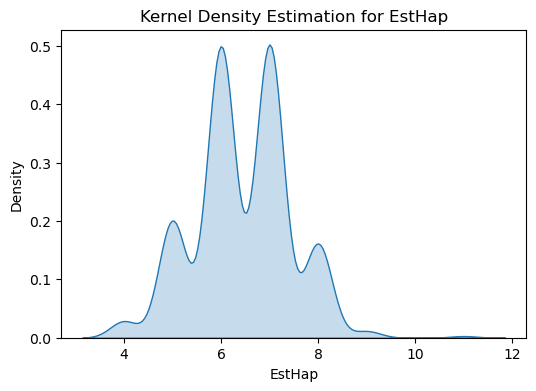

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


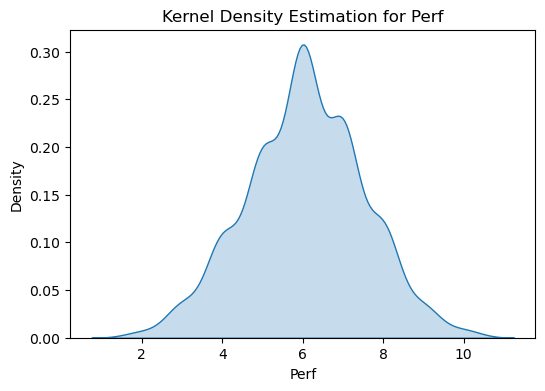

In [10]:
#Plot KDE (Kernel Density Estimation) plots for all numerical features
features = ['Pay', 'EstHap', 'Perf']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Kernel Density Estimation for {feature}')
    plt.show()

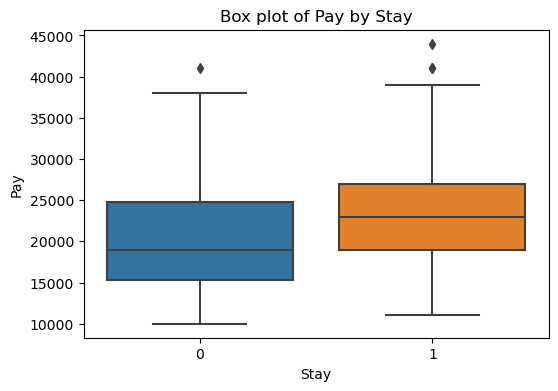

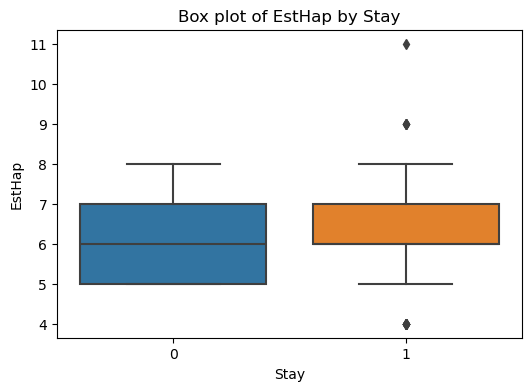

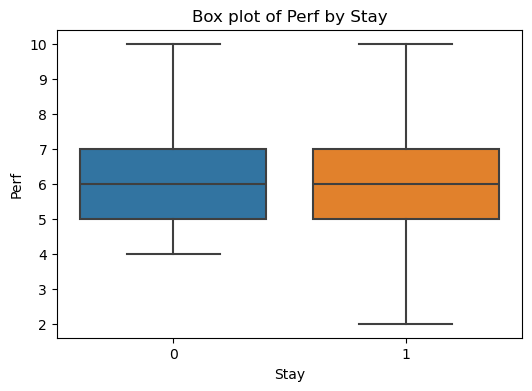

In [11]:
#Plot box plots for all numerical features against the target variable 'Stay'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Stay', y=feature, data=df, order=[0,1])
    #plt.ylim(0, df[feature].max())
    plt.title(f'Box plot of {feature} by Stay')
    plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


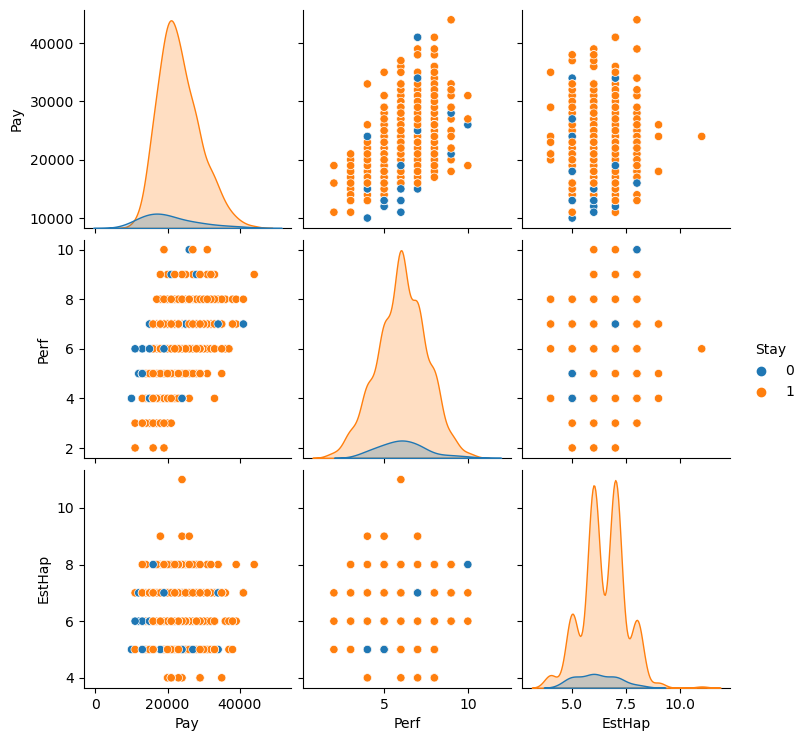

In [12]:
#Plot pairplots to see the relationships between all features
sns.pairplot(df, hue='Stay')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


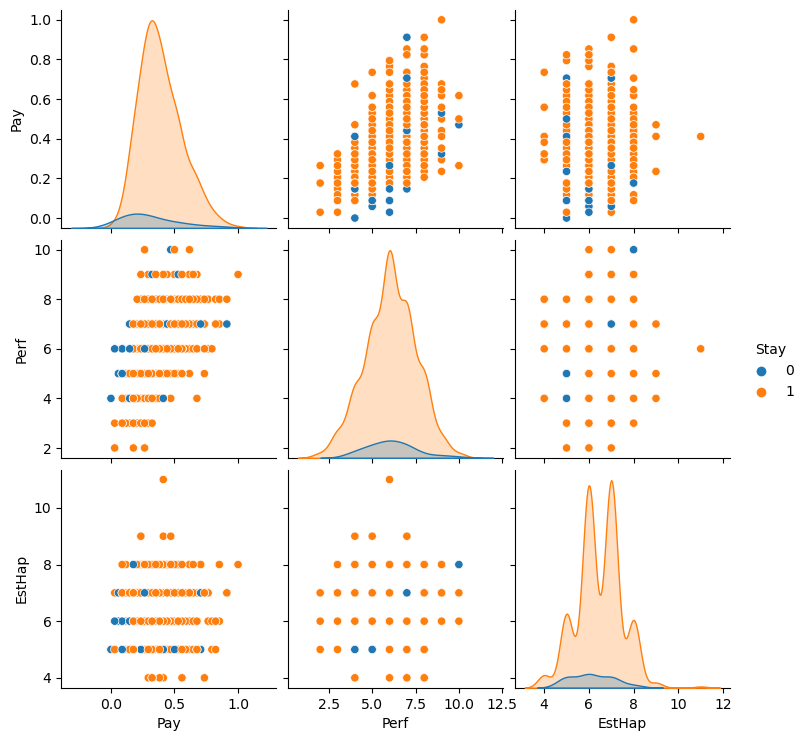

In [13]:
# Apply Min-Max Scaling to 'Pay'
scaler = MinMaxScaler()
df['Pay'] = scaler.fit_transform(df[['Pay']])

#Plot pairplots to see the relationships between all features
sns.pairplot(df, hue='Stay')
plt.show()

In [14]:
stay_counts = df['Stay'].value_counts()
print("Number of rows with Stay=0:", stay_counts[0])
print("Number of rows with Stay=1:", stay_counts[1])


# Separate features and target variable
X = df.drop(columns=['Stay'])
y = df['Stay']

Number of rows with Stay=0: 42
Number of rows with Stay=1: 456


In [15]:
# Apply Random Over-Sampling --  randomly duplicating samples from the minority class to balance the class distribution in the dataset.
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and target variable into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the class distribution after resampling
print("Class distribution after resampling:")
print(df_resampled['Stay'].value_counts())

Class distribution after resampling:
Stay
1    456
0    456
Name: count, dtype: int64


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


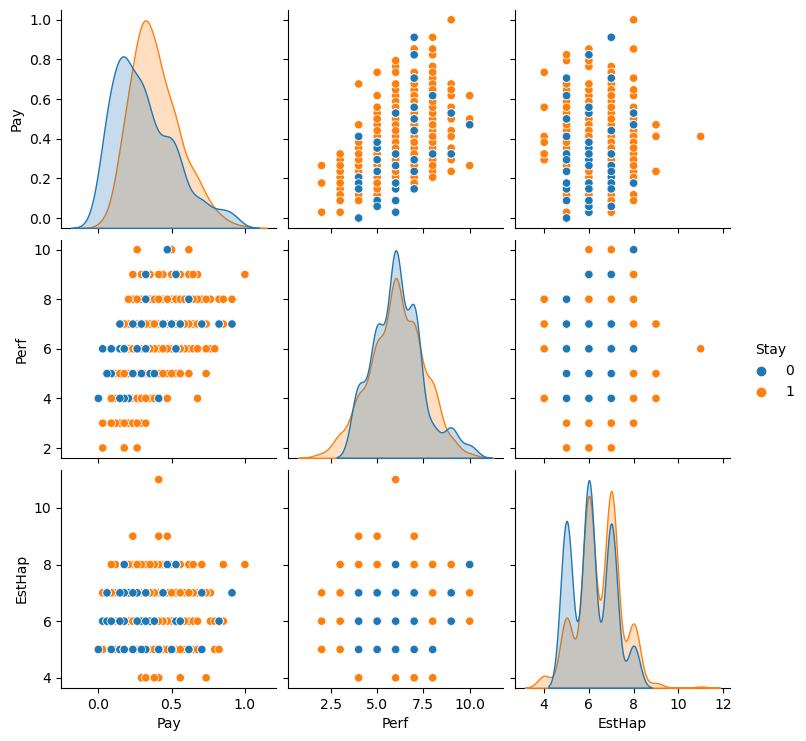

In [16]:
#Plot pairplots with normalised pay and with oversampled data added to increase stay values with 0 to see the relationships between all features
sns.pairplot(df_resampled, hue='Stay')
plt.show()

In [17]:
# SMOTE (Synthetic Minority Over-sampling Technique) works by generating synthetic samples for the minority class by interpolating between existing minority class samples.
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Combine resampled features and target variable into a new DataFrame
df_resampled_smote = pd.concat([X_res, y_res], axis=1)

# Display the class distribution after resampling
print("Class distribution after SMOTE resampling:")
print(df_resampled_smote['Stay'].value_counts())

Class distribution after SMOTE resampling:
Stay
1    456
0    456
Name: count, dtype: int64


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


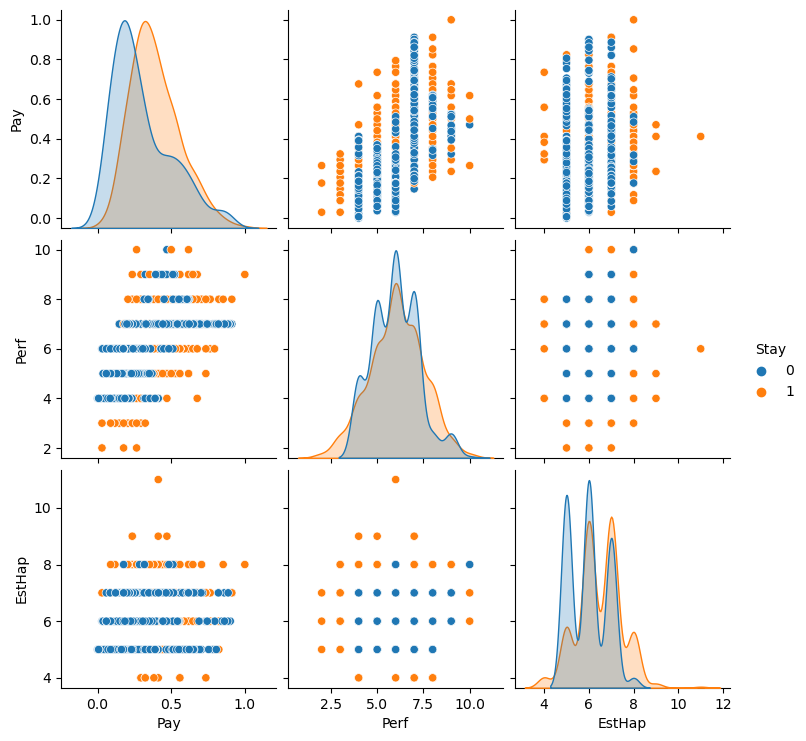

In [18]:
sns.pairplot(df_resampled_smote, hue='Stay')
plt.show()

In [19]:
# SMOTETomek combines SMOTE and Tomek links to both generate synthetic samples for the minority class and remove ambiguous samples 
# near the class boundary to create a more balanced and cleaner dataset.

smote_tomek = SMOTETomek(random_state=42)
X_res_smote_tomek, y_res_smote_tomek = smote_tomek.fit_resample(X, y)

# Combine resampled features and target variable into a new DataFrame
df_resampled_smote_tomek = pd.concat([X_res_smote_tomek, y_res_smote_tomek], axis=1)

# Display the class distribution after resampling
print("Class distribution after smote_tomek resampling:")
print(df_resampled_smote_tomek['Stay'].value_counts())

Class distribution after smote_tomek resampling:
Stay
1    437
0    437
Name: count, dtype: int64


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


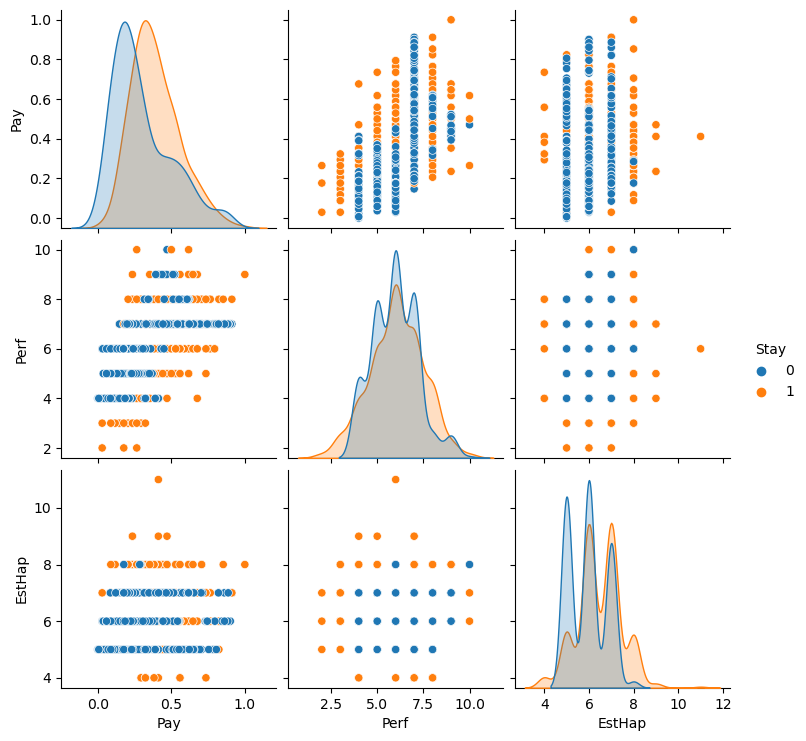

In [20]:
sns.pairplot(df_resampled_smote_tomek, hue='Stay')
plt.show()

## Feature Engineering

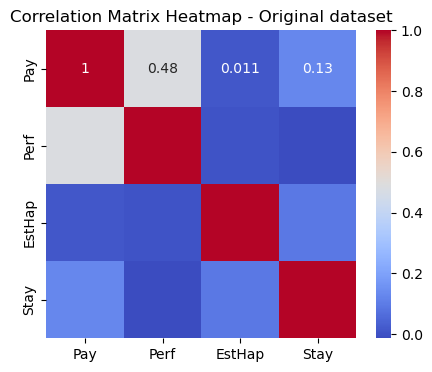

In [21]:
#Correlation matrix
corr_matrix = df.corr()
#Heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - Original dataset')
plt.show()

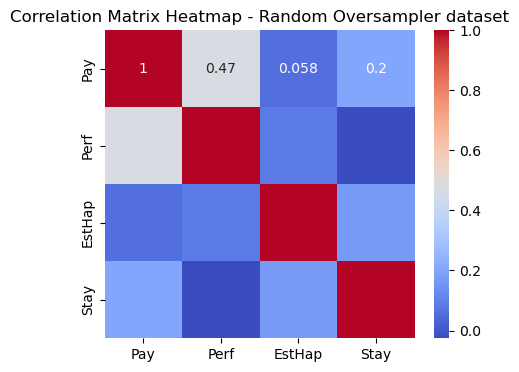

In [22]:
#Correlation matrix
corr_matrix_resampled = df_resampled.corr()
#Heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_resampled, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - Random Oversampler dataset')
plt.show()

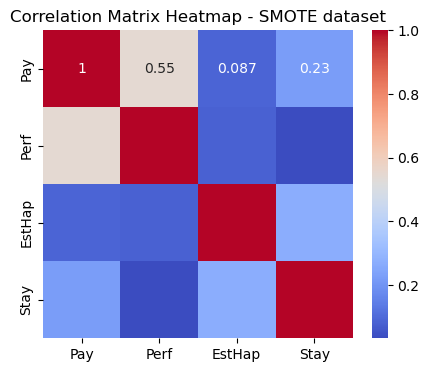

In [23]:
#Correlation matrix
corr_matrix_resampled_smote = df_resampled_smote.corr()
#Heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_resampled_smote, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - SMOTE dataset')
plt.show()

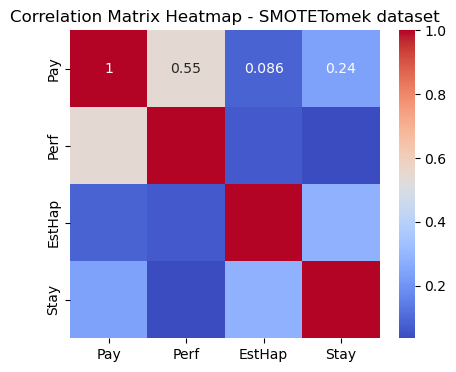

In [24]:
#Correlation matrix
corr_matrix_resampled_smote_tomek = df_resampled_smote_tomek.corr()
#Heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_resampled_smote_tomek, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - SMOTETomek dataset')
plt.show()

In [25]:
# Create interaction terms for numerical features
interaction_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = interaction_features.fit_transform(df_resampled_smote_tomek[['Pay', 'Perf']])
interaction_terms_df = pd.DataFrame(interaction_terms, columns=interaction_features.get_feature_names_out(['Pay', 'Perf']))
# Drop the original 'Pay' and 'Perf' columns from interaction_terms_df
interaction_terms_df = interaction_terms_df.drop(columns=['Pay', 'Perf'])

# Add interaction terms to the dataset
df_resampled_smote_tomek = pd.concat([df_resampled_smote_tomek, interaction_terms_df], axis=1)


In [26]:
# Polynomial Features for 'EstHap'
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_terms = poly_features.fit_transform(df_resampled_smote_tomek[['EstHap']])
poly_terms_df = pd.DataFrame(poly_terms, columns=poly_features.get_feature_names_out(['EstHap']))

# Drop the original 'Pay' and 'Perf' columns from interaction_terms_df
poly_terms_df = poly_terms_df.drop(columns=['EstHap'])
df_resampled_smote_tomek = pd.concat([df_resampled_smote_tomek, poly_terms_df], axis=1)

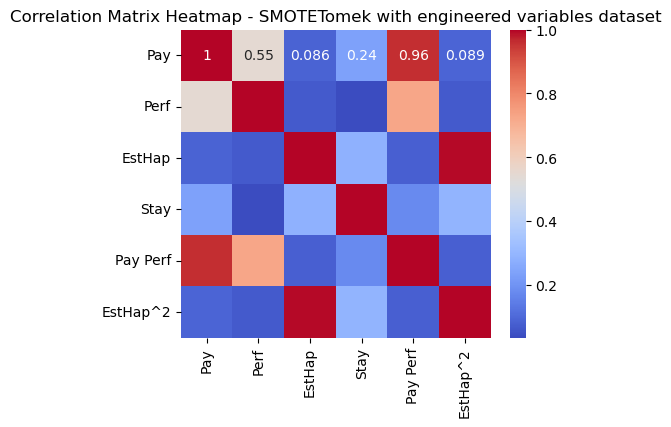

In [27]:
#Correlation matrix
corr_matrix_resampled_smote_tomek = df_resampled_smote_tomek.corr()

#Heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_resampled_smote_tomek, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - SMOTETomek with engineered variables dataset')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

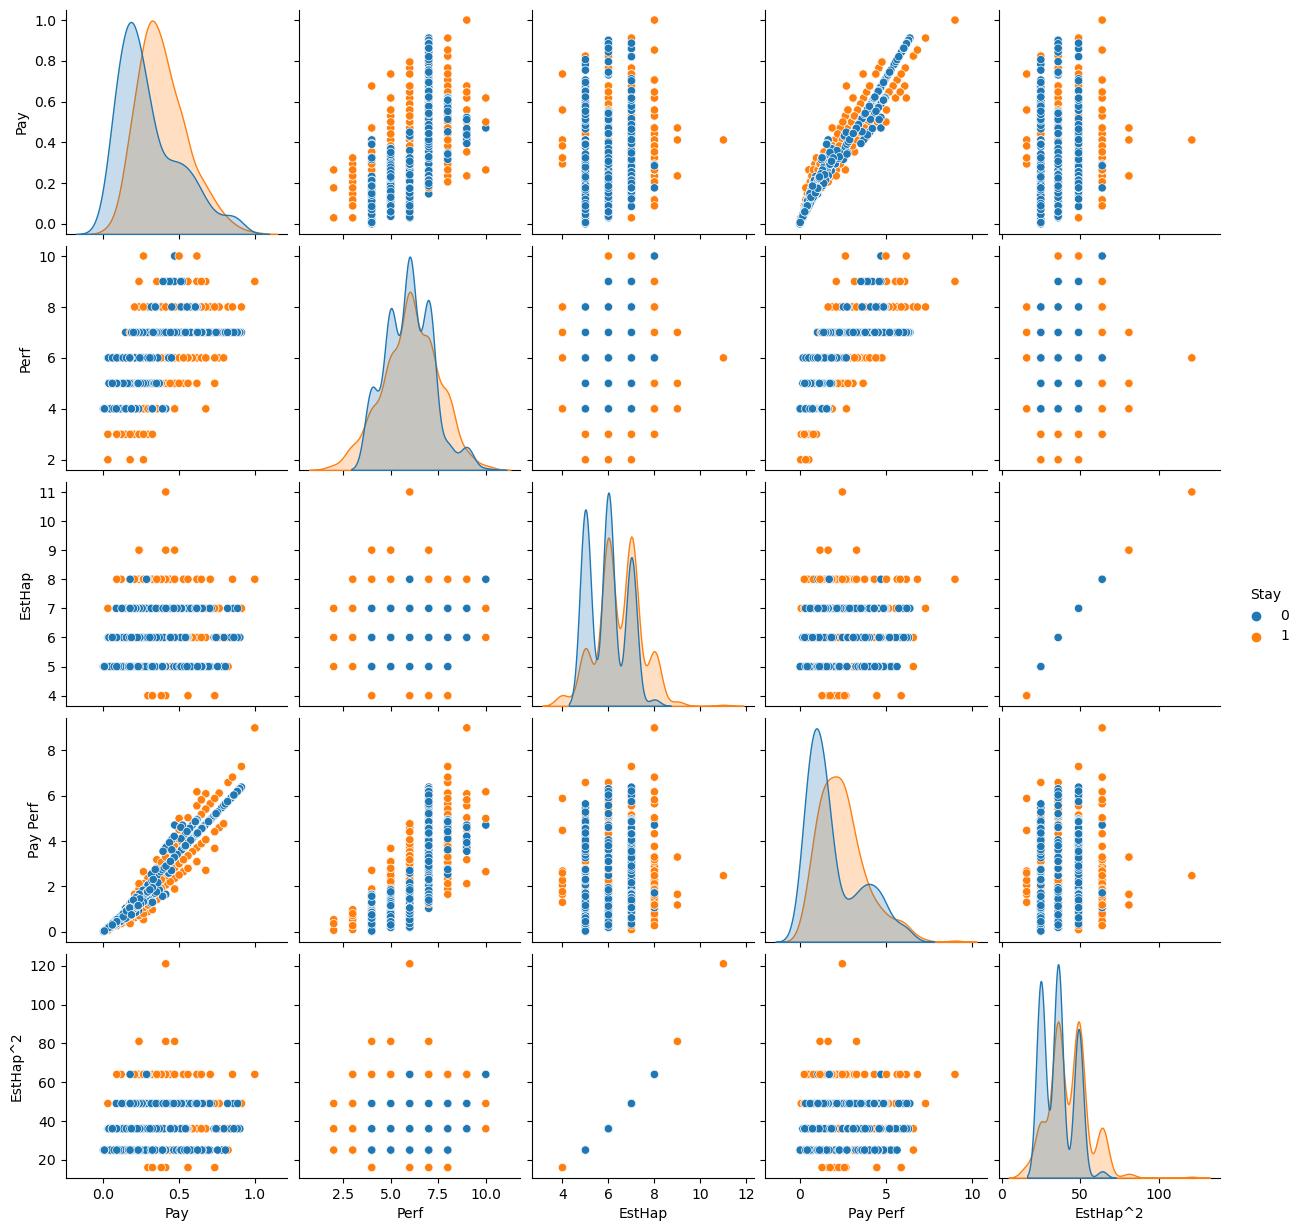

In [28]:
sns.pairplot(df_resampled_smote_tomek, hue='Stay')
plt.show()

In [29]:
# We observe that engineered variables do not give us much new information so we drop them
df_resampled_smote_tomek_new = df_resampled_smote_tomek.drop(columns=['EstHap^2', 'Pay Perf'])
df_resampled_smote_tomek_new.head()

,Pay,Perf,EstHap,Stay
0,0.676471,6,7,1
1,0.441176,6,7,1
2,0.176471,5,6,1
3,0.205882,7,7,1
4,0.529412,7,7,1


## Model Creation

In [30]:
# Set our traget and feature variables with the new dataset
X = df_resampled_smote_tomek_new.drop('Stay', axis=1)#df_resampled_smote_tomek.drop('Stay', axis=1)
y = df_resampled_smote_tomek_new['Stay'] #df_resampled_smote_tomek['Stay']

In [31]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=20, stratify=y_train_full)

# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga']}
]

# Initialize variables to store the best model and its performance
best_model = None
best_params = None
best_accuracy = 0
best_precision = 0

# Iterate over each combination of parameters
for params in param_grid:
    penalties = params['penalty']
    Cs = params['C']
    solvers = params['solver']
    
    for penalty in penalties:
        for C in Cs:
            for solver in solvers:
                # Initialize and train the logistic regression model
                model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42, max_iter=10000)
                
                try:
                    model.fit(X_train, y_train)
                    
                    # Evaluate the model on the validation set
                    y_val_pred = model.predict(X_val)
                    accuracy = accuracy_score(y_val, y_val_pred)
                    f1 = f1_score(y_val, y_val_pred)
                    recall = recall_score(y_val, y_val_pred)
                    precision = precision_score(y_val, y_val_pred)
                    
                    # Output the current model parameters and its performance
                    print(f"Model parameters: penalty={penalty}, C={C}, solver={solver}")
                    print(f"Validation Accuracy: {accuracy}")
                    print(f"Validation F1 Score: {f1}")
                    print(f"Validation Recall: {recall}")
                    print(f"Validation Precision: {precision}")
                    print("-" * 60)
                    
                    # Update the best model if the current one is better
                    if (accuracy > best_accuracy) or (accuracy == best_accuracy and precision > best_precision):
                        best_model = model
                        best_params = {'penalty': penalty, 'C': C, 'solver': solver}
                        best_accuracy = accuracy
                        best_precision = precision
                
                except Exception as e:
                    print(f"Failed to train model with parameters: penalty={penalty}, C={C}, solver={solver}")
                    print(f"Error: {e}")

# Output the best model and its parameters
print(f"Best model parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")
print(f"Best Validation Precision: {best_precision}")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model parameters: penalty=l1, C=0.01, solver=liblinear
Validation Accuracy: 0.5028571428571429
Validation F1 Score: 0.0
Validation Recall: 0.0
Validation Precision: 0.0
------------------------------------------------------------
Model parameters: penalty=l1, C=0.1, solver=liblinear
Validation Accuracy: 0.46285714285714286
Validation F1 Score: 0.5727272727272726
Validation Recall: 0.7241379310344828
Validation Precision: 0.47368421052631576
------------------------------------------------------------
Model parameters: penalty=l1, C=1, solver=liblinear
Validation Accuracy: 0.72
Validation F1 Score: 0.7231638418079096
Validation Recall: 0.735632183908046
Validation Precision: 0.7111111111111111
------------------------------------------------------------
Model parameters: penalty=l1, C=10, solver=liblinear
Validation Accuracy: 0.7142857142857143
Validation F1 Score: 0.7159090909090908
Validation Recall: 0.7241379310344828
Validation Precision: 0.7078651685393258
-------------------------

In [32]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("Test Set Performance:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Set Performance:
Test Accuracy: 0.7314285714285714
Test Precision: 0.7252747252747253
Test Recall: 0.75
Test F1 Score: 0.7374301675977653


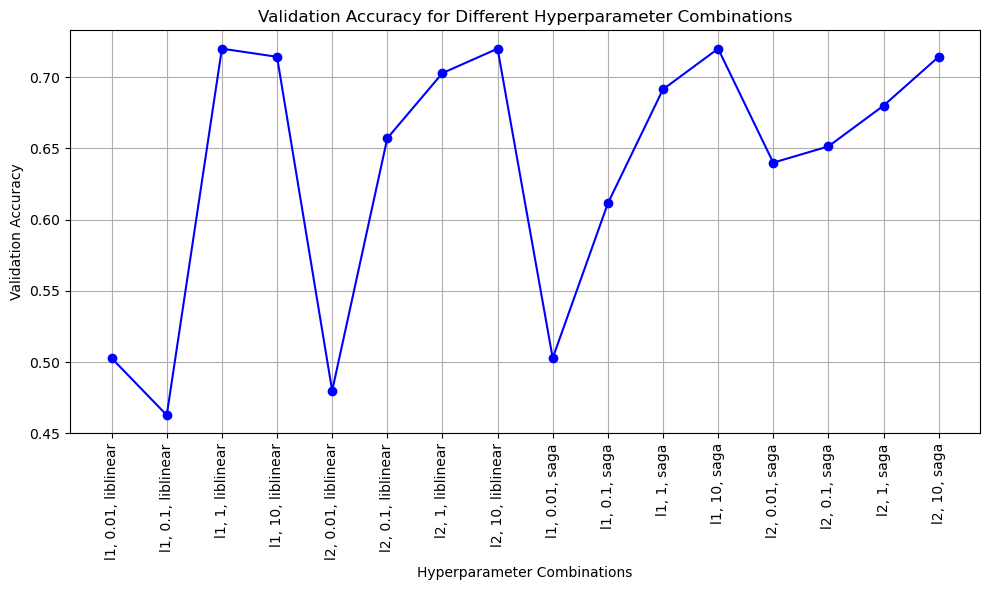

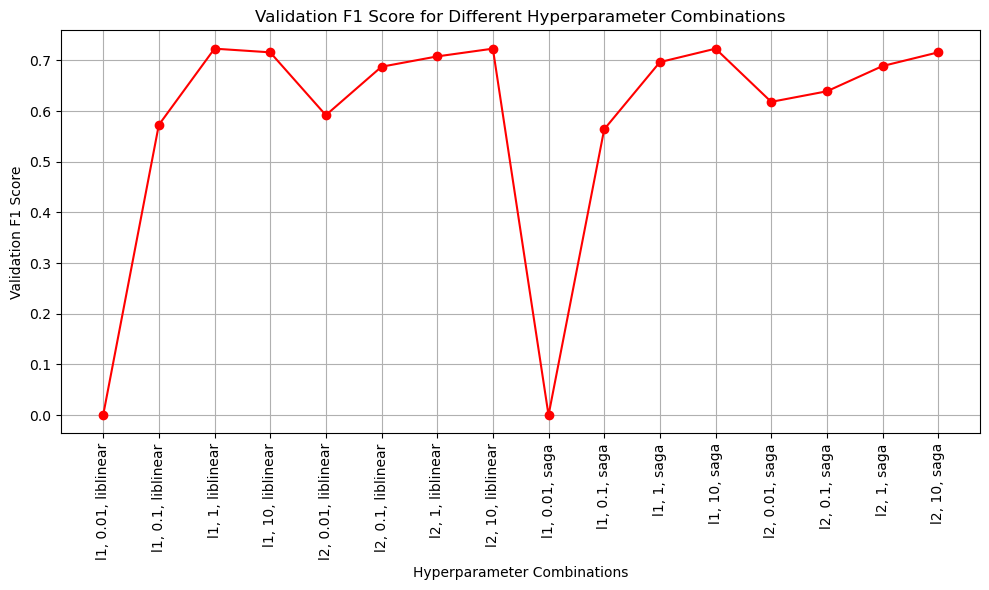

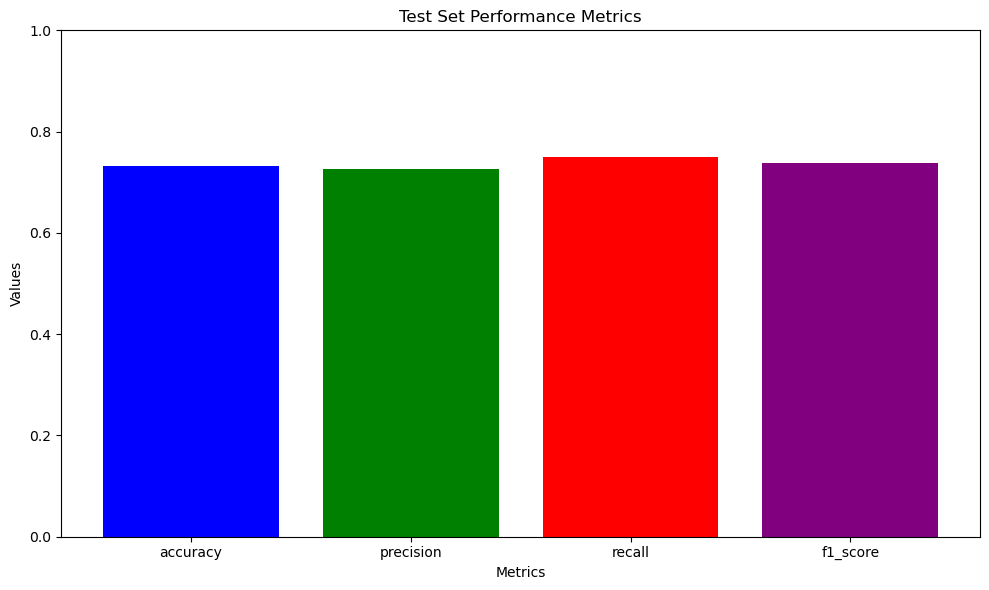

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the hyperparameter tuning results
parameters = [
    {'penalty': 'l1', 'C': 0.01, 'solver': 'liblinear', 'accuracy': 0.502857, 'f1_score': 0.0},
    {'penalty': 'l1', 'C': 0.1, 'solver': 'liblinear', 'accuracy': 0.462857, 'f1_score': 0.572727},
    {'penalty': 'l1', 'C': 1, 'solver': 'liblinear', 'accuracy': 0.72, 'f1_score': 0.723164},
    {'penalty': 'l1', 'C': 10, 'solver': 'liblinear', 'accuracy': 0.714286, 'f1_score': 0.715909},
    {'penalty': 'l2', 'C': 0.01, 'solver': 'liblinear', 'accuracy': 0.48, 'f1_score': 0.591928},
    {'penalty': 'l2', 'C': 0.1, 'solver': 'liblinear', 'accuracy': 0.657143, 'f1_score': 0.6875},
    {'penalty': 'l2', 'C': 1, 'solver': 'liblinear', 'accuracy': 0.702857, 'f1_score': 0.707865},
    {'penalty': 'l2', 'C': 10, 'solver': 'liblinear', 'accuracy': 0.72, 'f1_score': 0.723164},
    {'penalty': 'l1', 'C': 0.01, 'solver': 'saga', 'accuracy': 0.502857, 'f1_score': 0.0},
    {'penalty': 'l1', 'C': 0.1, 'solver': 'saga', 'accuracy': 0.611429, 'f1_score': 0.564103},
    {'penalty': 'l1', 'C': 1, 'solver': 'saga', 'accuracy': 0.691429, 'f1_score': 0.696629},
    {'penalty': 'l1', 'C': 10, 'solver': 'saga', 'accuracy': 0.72, 'f1_score': 0.723164},
    {'penalty': 'l2', 'C': 0.01, 'solver': 'saga', 'accuracy': 0.64, 'f1_score': 0.618182},
    {'penalty': 'l2', 'C': 0.1, 'solver': 'saga', 'accuracy': 0.651429, 'f1_score': 0.639053},
    {'penalty': 'l2', 'C': 1, 'solver': 'saga', 'accuracy': 0.68, 'f1_score': 0.688889},
    {'penalty': 'l2', 'C': 10, 'solver': 'saga', 'accuracy': 0.714286, 'f1_score': 0.715909},
]

# Extracting data for plotting
penalties = [param['penalty'] for param in parameters]
C_values = [param['C'] for param in parameters]
solvers = [param['solver'] for param in parameters]
accuracies = [param['accuracy'] for param in parameters]
f1_scores = [param['f1_score'] for param in parameters]

# Plotting Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Validation Accuracy')
plt.xticks(ticks=np.arange(len(accuracies)), labels=[f"{penalty}, {C}, {solver}" for penalty, C, solver in zip(penalties, C_values, solvers)], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig('validation_accuracy.png')
plt.show()

# Plotting Validation F1 Score
plt.figure(figsize=(10, 6))
plt.plot(f1_scores, marker='o', linestyle='-', color='r')
plt.title('Validation F1 Score for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Validation F1 Score')
plt.xticks(ticks=np.arange(len(f1_scores)), labels=[f"{penalty}, {C}, {solver}" for penalty, C, solver in zip(penalties, C_values, solvers)], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig('validation_f1_score.png')
plt.show()

# Test set performance data
test_metrics = {
    'accuracy': 0.7314285714285714,
    'precision': 0.7252747252747253,
    'recall': 0.75,
    'f1_score': 0.7374301675977653
}

# Plotting Test Set Performance Metrics
plt.figure(figsize=(10, 6))
metrics = list(test_metrics.keys())
values = list(test_metrics.values())
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Test Set Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('test_performance.png')
plt.show()


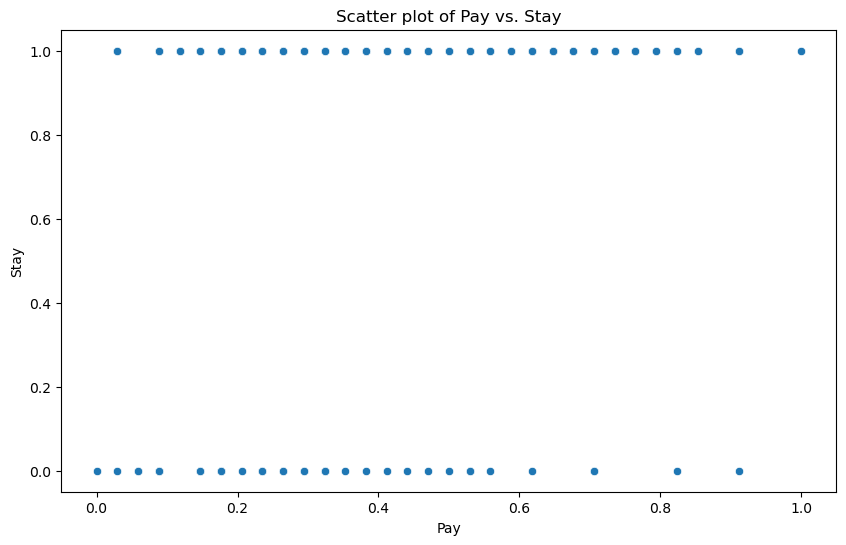

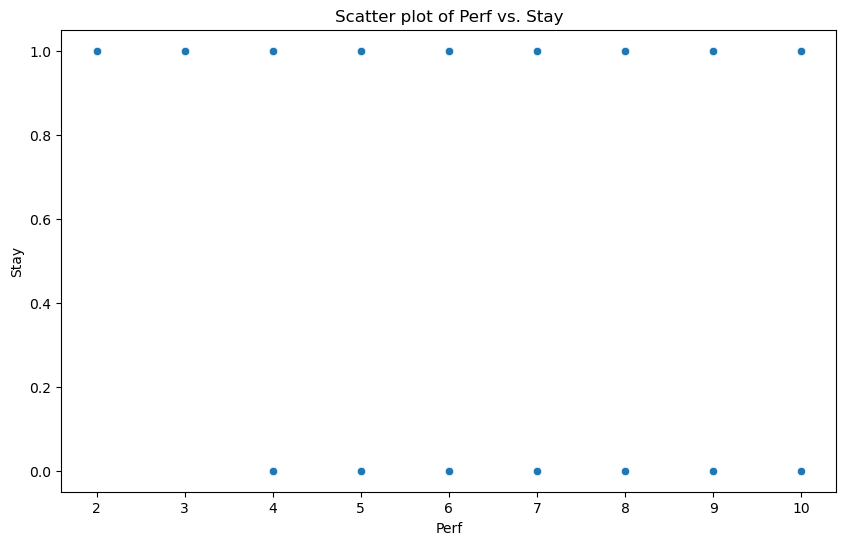

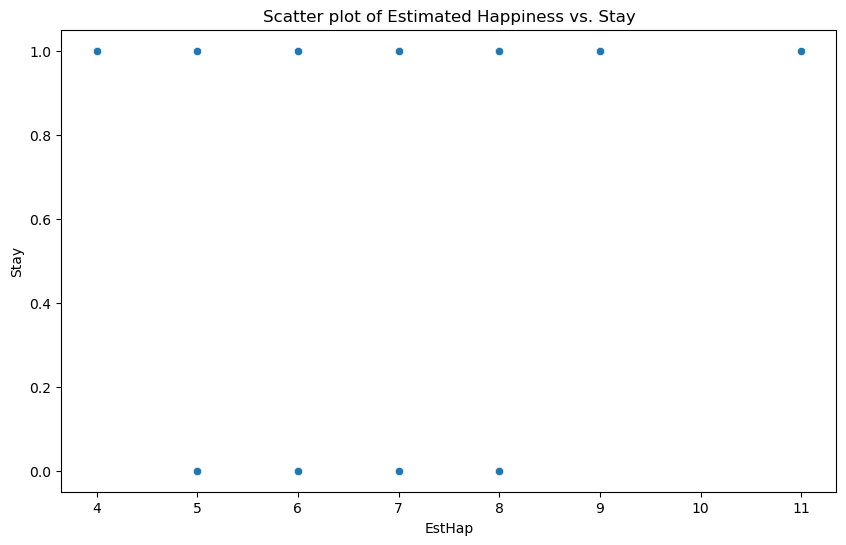

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


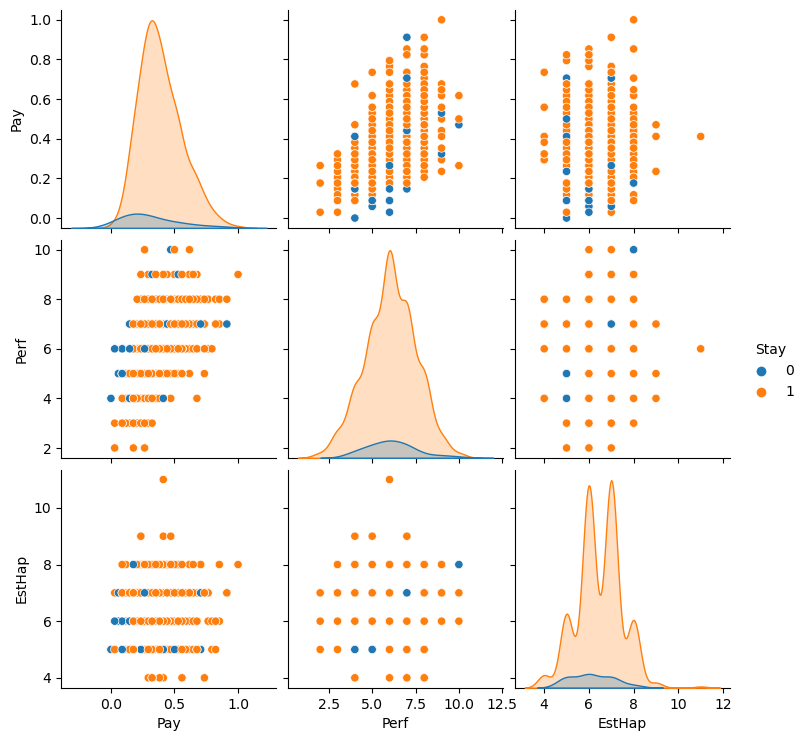

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Pay vs. Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pay', y='Stay', data=df)
plt.title('Scatter plot of Pay vs. Stay')
plt.show()

# Scatter plot for Perf vs. Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Perf', y='Stay', data=df)
plt.title('Scatter plot of Perf vs. Stay')
plt.show()

# Scatter plot for EstHap vs. Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EstHap', y='Stay', data=df)
plt.title('Scatter plot of Estimated Happiness vs. Stay')
plt.show()

# Pair plot for all features
sns.pairplot(df, hue='Stay')
plt.show()
